In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
observations = pd.read_csv('observations.csv',index_col=0)

In [3]:
observations.head()

,away_cap,away_last_season_conferenceHomeRank,away_last_season_conferenceL10Rank,away_last_season_conferenceRank,away_last_season_conferenceRoadRank,away_last_season_divisionHomeRank,away_last_season_divisionL10Rank,away_last_season_divisionRank,away_last_season_divisionRoadRank,away_last_season_gamesPlayed,...,home_last_season_ppConferenceRank,home_last_season_ppDivisionRank,home_last_season_ppLeagueRank,home_last_season_row,home_last_season_streak.streakNumber,home_last_season_team.id,home_last_season_wildCardRank,home_lost,home_won,outcome_categorical
20171006_173713,72989072.0,10.0,7.0,8.0,7.0,4.0,4.0,4.0,4.0,82.0,...,9.0,5.0,20.0,37.0,7.0,52.0,3.0,0.0,0.0,away
20171008_080732,73546558.0,7.0,4.0,5.0,4.0,4.0,2.0,3.0,3.0,82.0,...,2.0,2.0,2.0,46.0,2.0,5.0,0.0,0.0,0.0,away
20171008_080734,78458260.0,9.0,11.0,7.0,5.0,4.0,5.0,4.0,2.0,82.0,...,4.0,2.0,7.0,43.0,3.0,22.0,0.0,0.0,0.0,home
20171008_160734,73546558.0,4.0,4.0,11.0,14.0,4.0,3.0,6.0,7.0,82.0,...,5.0,3.0,10.0,44.0,1.0,28.0,0.0,0.0,0.0,away
20171009_153739,75286038.0,5.0,6.0,8.0,10.0,3.0,4.0,4.0,5.0,82.0,...,7.0,3.0,13.0,42.0,1.0,6.0,0.0,0.0,0.0,home


In [4]:
observations['date'] = observations.index.str.extract(r"(?P<date>[\d]*)(?:[\w]*)",expand=False)
observations.head()

,away_cap,away_last_season_conferenceHomeRank,away_last_season_conferenceL10Rank,away_last_season_conferenceRank,away_last_season_conferenceRoadRank,away_last_season_divisionHomeRank,away_last_season_divisionL10Rank,away_last_season_divisionRank,away_last_season_divisionRoadRank,away_last_season_gamesPlayed,...,home_last_season_ppDivisionRank,home_last_season_ppLeagueRank,home_last_season_row,home_last_season_streak.streakNumber,home_last_season_team.id,home_last_season_wildCardRank,home_lost,home_won,outcome_categorical,date
20171006_173713,72989072.0,10.0,7.0,8.0,7.0,4.0,4.0,4.0,4.0,82.0,...,5.0,20.0,37.0,7.0,52.0,3.0,0.0,0.0,away,20171006
20171008_080732,73546558.0,7.0,4.0,5.0,4.0,4.0,2.0,3.0,3.0,82.0,...,2.0,2.0,46.0,2.0,5.0,0.0,0.0,0.0,away,20171008
20171008_080734,78458260.0,9.0,11.0,7.0,5.0,4.0,5.0,4.0,2.0,82.0,...,2.0,7.0,43.0,3.0,22.0,0.0,0.0,0.0,home,20171008
20171008_160734,73546558.0,4.0,4.0,11.0,14.0,4.0,3.0,6.0,7.0,82.0,...,3.0,10.0,44.0,1.0,28.0,0.0,0.0,0.0,away,20171008
20171009_153739,75286038.0,5.0,6.0,8.0,10.0,3.0,4.0,4.0,5.0,82.0,...,3.0,13.0,42.0,1.0,6.0,0.0,0.0,0.0,home,20171009


In [11]:
def model_by_date(date_observations, features_list):
    
    training_df = observations[observations['date']<date_observations.name]
    
    if len(training_df)>0:
        training_df=training_df.fillna(training_df.mean())
        testing_df=date_observations.fillna(training_df.mean())
        
        features=training_df[features_list]
        target=training_df['outcome_categorical']
        clf=LogisticRegression()
        reg=clf.fit(features,target)
        
        labels=testing_df['outcome_categorical']
        predictions=reg.predict(testing_df[features_list])
        
        retvals={}
        retvals['accuracy']=accuracy_score(labels,predictions)
        retvals['num_training']=len(training_df)
        retvals['num_testing']=len(testing_df)
        retvals['model']=reg
        retvals['coef']=dict(zip(features,reg.coef_[0]))
        
        return pd.Series(retvals)
    
    return pd.Series({"accuracy":np.nan,"num_training":np.nan,"num_testing":np.nan,"model":None,"coef":None})


In [12]:
features_list=set(observations.columns)-set(('outcome_categorical','date'))
daily_models_df=pd.DataFrame(observations.groupby("date").apply(model_by_date,features_list))

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training_df=training_df.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexe

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will ra

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will ra

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will ra

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will ra

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training_df=training_df.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise T

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will ra

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training_df=training_df.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise T

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training_df=training_df.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexe

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training_df=training_df.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise T

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will ra

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training_df=training_df.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise T

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will ra

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training_df=training_df.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise T

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will ra

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training_df=training_df.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexe

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will ra

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training_df=training_df.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a s

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training_df=training_df.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise T

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training_df=training_df.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a s

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will ra

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training_df=training_df.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a s

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features=training_df[features_list]
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will ra

C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  predictions=reg.predict(testing_df[features_list])
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training_df=training_df.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_df=date_observations.fillna(training_df.mean())
C:\Users\abhav\AppData\Local\Temp\ipykernel_34152\2720923384.py:9: FutureWarning: Passing a s

In [14]:
daily_models_df.head()

,accuracy,num_training,num_testing,model,coef
date,,,,,
20171006,NaN,NaN,NaN,NaN,NaN
20171008,0.714286,2.0,7.0,LogisticRegression(),{'away_last_season_wildCardRank': 5.7910825730...
20171009,0.833333,9.0,6.0,LogisticRegression(),{'away_last_season_wildCardRank': 2.1297372324...
20171010,1.000000,15.0,5.0,LogisticRegression(),{'away_last_season_wildCardRank': 2.0616251317...
20171011,1.000000,20.0,9.0,LogisticRegression(),{'away_last_season_wildCardRank': 1.1047962278...


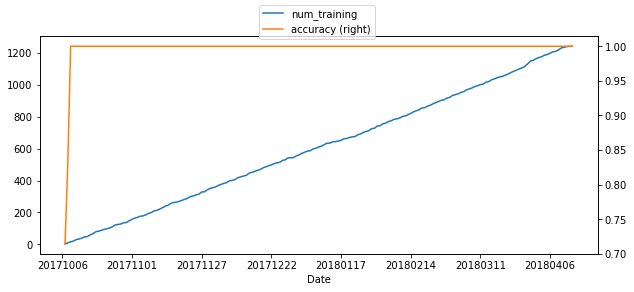

In [15]:
daily_models_df[["num_training","accuracy"]].plot(secondary_y="accuracy",xlabel="Date",legend=False,figsize=(10,4))
plt.gcf().legend(loc='upper center')